In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from textblob import TextBlob
import textwrap


In [ ]:
df1 = pd.read_csv('/content/Inflight Service_Inventory data.csv')
print(df1.head())
df2 = pd.read_csv('/content/Inflight Service_Pre order data.csv')
print(df2.head())
df3 = pd.read_csv('/content/Survey data _Customer comments.csv')
print(df3.head())
df4 = pd.read_csv('/content/Survey data_Inflight Satisfaction Score.csv')
print(df4.head())


   flight_number departure_station_code arrival_station_code  \
0           2634                    IAX                  PDX   
1           2666                    ORX                  IAX   
2           2310                    DEX                  SAX   
3           1712                    SFX                  CLX   
4           1225                    LAX                  HNX   

  scheduled_departure_dtl  entree_product_id  \
0                9/1/2022              58019   
1                9/1/2022              60549   
2                9/2/2022              58981   
3                9/4/2022              58764   
4                9/8/2022              60549   

                  entree_description entree_code  planned_entree_count  \
0                     Belgium waffle          WF                    20   
1  Vegetarian chili and polenta cake           V                     3   
2                     Scrambled eggs           O                     9   
3         Mediterranean Falafe

DATA **CLEANING**

In [ ]:
df1.rename(columns={'scheduled_departure_date': 'scheduled_departure_dtl'}, inplace=True)
df1.rename(columns={'departure_station_code': 'departure_station_code'}, inplace=True)
df1.rename(columns={'arrival_station_code': 'arrival_station_code'}, inplace=True)
df2.rename(columns={'scheduled_departure_date': 'scheduled_departure_dtl'}, inplace=True)
df2.rename(columns={'departure_station_code': 'departure_station_code'}, inplace=True)
df2.rename(columns={'arrival_station_code': 'arrival_station_code'}, inplace=True)
df3.rename(columns={'scheduled_departure_date': 'scheduled_departure_dtl'}, inplace=True)
df3.rename(columns={'origin_station_code': 'departure_station_code'}, inplace=True)
df3.rename(columns={'arrival_station_code': 'arrival_station_code'}, inplace=True)
df4.rename(columns={'scheduled_departure_date': 'scheduled_departure_dtl'}, inplace=True)
df4.rename(columns={'destination_station_code': 'arrival_station_code'}, inplace=True)
df4.rename(columns={'origin_station_code': 'departure_station_code'}, inplace=True)

In [ ]:
common_columns = ['flight_number', 'arrival_station_code', 'departure_station_code', 'record_locator','scheduled_departure_dtl']
#data_inflight_satisfaction_score = ['flight_number', 'destination_station_code', 'origin_station_code', 'record_locator','scheduled_departure_date']  # Replace with your actual common column names
merged_df = pd.merge(df4, df2, on=common_columns, how='inner')
merged_df['score'] = pd.to_numeric(merged_df['score'], errors='coerce')
food_satisfaction_info = merged_df.groupby('meal_short_description')['score'].mean()
food_satisfaction_info2 = merged_df.groupby('meal_short_description')['score'].count()
print(merged_df)
#print(food_satisfaction_info2)

# Merge the two aggregated DataFrames
food_impact_info = pd.merge(food_satisfaction_info, food_satisfaction_info2, left_index=True, right_index=True)
food_impact_info.columns = ['average_satisfaction_score', 'score_count']

# Calculate a composite impact score
# You can customize the calculation based on your requirements
food_impact_info['composite_impact_score'] = food_impact_info['average_satisfaction_score'] * food_impact_info['score_count']

# Sort the DataFrame by composite impact score to see the impact of each food item
food_impact_info = food_impact_info.sort_values(by='composite_impact_score', ascending=False)

# Display the food impact information
#print(food_impact_info.head())
# Calculate the total composite impact score for normalization
total_composite_impact = food_impact_info['composite_impact_score'].sum()

# Calculate the percentage impact score
food_impact_info['percentage_impact'] = (food_impact_info['composite_impact_score'] / total_composite_impact) * 100

# Sort the DataFrame by percentage impact in descending order
food_impact_info = food_impact_info.sort_values(by='percentage_impact', ascending=False)




      flight_number departure_station_code arrival_station_code  \
0               486                    IAX                  INX   
1               486                    IAX                  INX   
2               585                    DEX                  ORX   
3               585                    DEX                  ORX   
4              1900                    IAX                  ORX   
...             ...                    ...                  ...   
5593           1188                    BOX                  SFX   
5594            384                    HNX                  DEX   
5595            384                    HNX                  DEX   
5596            384                    HNX                  DEX   
5597            203                    ORX                  OGX   

     record_locator scheduled_departure_dtl  \
0            PWXXBF                9/1/2022   
1            PWXXBF                9/1/2022   
2            J2XXB2                9/1/2022   
3      

In [ ]:
  # Simulate score increase for a specific food item (e.g., "Za’atar chicken") by 1 percent
  food_item = "Za’atar chicken"
  percent_increase = 10  # in percent

  # Calculate current overall satisfaction
  current_overall_satisfaction = (food_impact_info['percentage_impact'] * food_impact_info['average_satisfaction_score']).sum()

  # Simulate score increase and calculate new overall satisfaction
  food_impact_info.loc[food_item, 'average_satisfaction_score'] *= (1 + percent_increase / 100)
  new_overall_satisfaction = (food_impact_info['percentage_impact'] * food_impact_info['average_satisfaction_score']).sum()

  # Calculate change in overall satisfaction
  change_in_satisfaction = (new_overall_satisfaction - current_overall_satisfaction)/current_overall_satisfaction

  print(f"If the satisfaction score of '{food_item}' is increased by {percent_increase}%:")
  print(f"The overall satisfaction will change by approximately {change_in_satisfaction:.2f} points.")


If the satisfaction score of 'Za’atar chicken' is increased by 10%:
The overall satisfaction will change by approximately 0.01 points.


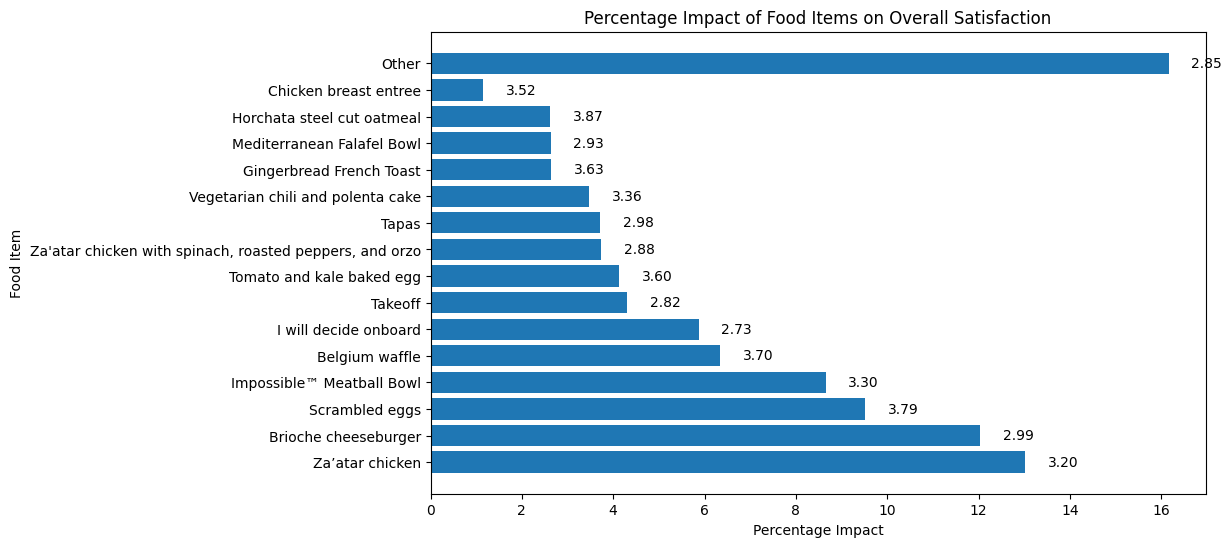

In [ ]:


# Sort the DataFrame by percentage impact in descending order
food_impact_info = food_impact_info.sort_values(by='percentage_impact', ascending=False)

# Create a new DataFrame where items with less than 1% are grouped as 'Other'
threshold = 1
top_food = food_impact_info[food_impact_info['percentage_impact'] >= threshold]
other_food = food_impact_info[food_impact_info['percentage_impact'] < threshold]
other_row = pd.DataFrame({
    'average_satisfaction_score': other_food['average_satisfaction_score'].mean(),
    'score_count': other_food['score_count'].sum(),
    'composite_impact_score': other_food['composite_impact_score'].sum(),
    'percentage_impact': other_food['percentage_impact'].sum()
}, index=['Other'])
combined_food = pd.concat([top_food, other_row])

# Create a bar plot of percentage impact
plt.figure(figsize=(10, 6))
bars = plt.barh(combined_food.index, combined_food['percentage_impact'])
plt.xlabel('Percentage Impact')
plt.ylabel('Food Item')
plt.title('Percentage Impact of Food Items on Overall Satisfaction')

# Annotate the bars with average satisfaction scores
for bar, score in zip(bars, combined_food['average_satisfaction_score']):
    if combined_food.index[0] == 'Other' and bar.get_y() == bars[-1].get_y():
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height(), f'{score:.2f}', va='bottom')
    else:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{score:.2f}', va='center')

plt.show()


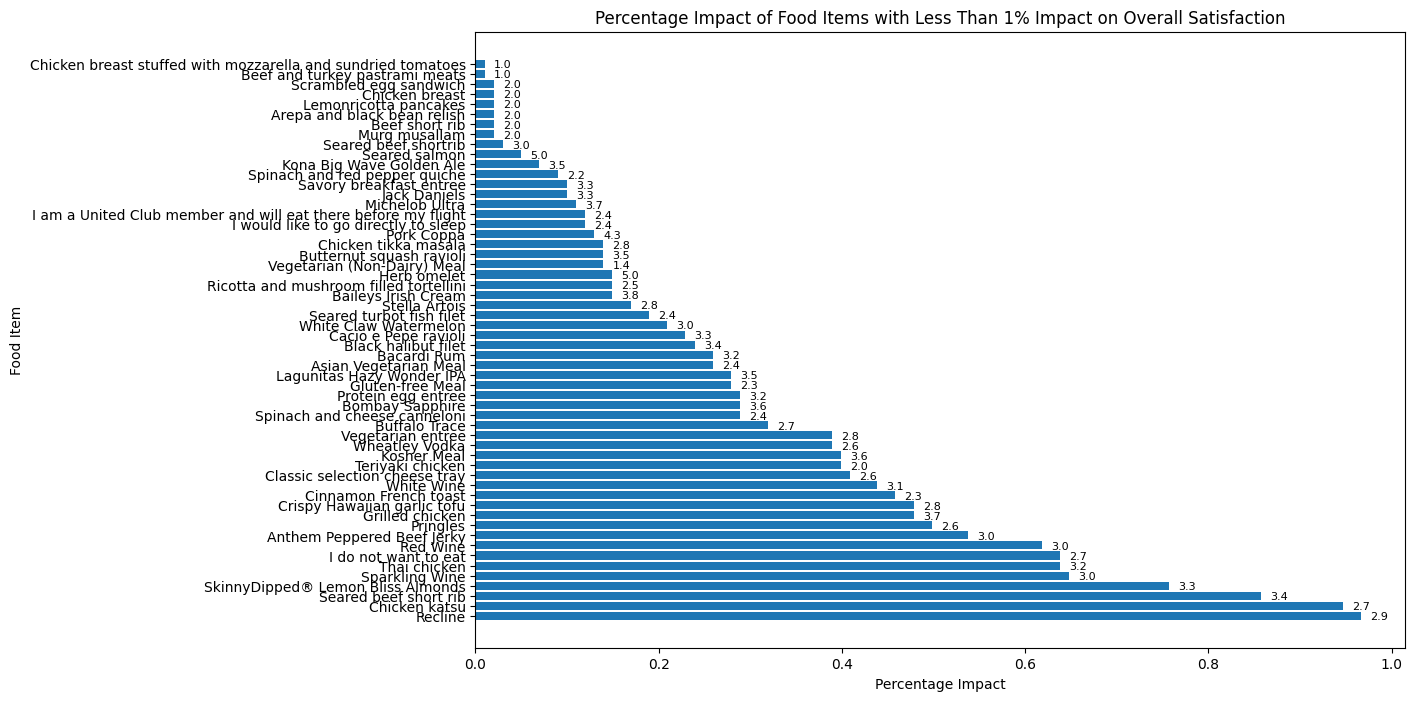

In [ ]:

# Sort the DataFrame by percentage impact in descending order
food_impact_info = food_impact_info.sort_values(by='percentage_impact', ascending=False)

# Select food items with a percentage impact less than 1%
low_impact_food = food_impact_info[food_impact_info['percentage_impact'] < 1]

# Create a bar plot for food items with low percentage impact
plt.figure(figsize=(12, 8))
bars = plt.barh(low_impact_food.index, low_impact_food['percentage_impact'])
plt.xlabel('Percentage Impact')
plt.ylabel('Food Item')
plt.title('Percentage Impact of Food Items with Less Than 1% Impact on Overall Satisfaction')
for bar, score in zip(bars, low_impact_food['average_satisfaction_score']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height(), f'{score:.1f}', va='top',fontsize = 8)

plt.show()

In [ ]:
#print(merged_df.head())
print('hiii')

# Read the average satisfaction scores data from CSV

# Merge the dataframes based on 'meal_short_description'
merged_df = merged_df.merge(food_satisfaction_info, how='left', left_on='meal_short_description', right_index=True)

# Print the merged data


# Group by 'flight_number' and 'scheduled_departure_dtl', then count unique days
flight_day_counts = df3.groupby(['flight_number', 'scheduled_departure_dtl']).size().groupby('flight_number').size()

# Sort the flight day counts in ascending order
sorted_flight_day_counts = flight_day_counts.sort_values()

print(sorted_flight_day_counts)



hiii
flight_number
4821     1
1767     1
4681     1
1762     1
1760     1
        ..
1142    17
931     18
991     18
126     19
871     20
Length: 3001, dtype: int64


      flight_number departure_station_code arrival_station_code  \
0               486                    IAX                  INX   
1               486                    IAX                  INX   
2               585                    DEX                  ORX   
3               585                    DEX                  ORX   
4              1900                    IAX                  ORX   
...             ...                    ...                  ...   
5593           1188                    BOX                  SFX   
5594            384                    HNX                  DEX   
5595            384                    HNX                  DEX   
5596            384                    HNX                  DEX   
5597            203                    ORX                  OGX   

     record_locator scheduled_departure_dtl  \
0            PWXXBF                9/1/2022   
1            PWXXBF                9/1/2022   
2            J2XXB2                9/1/2022   
3      

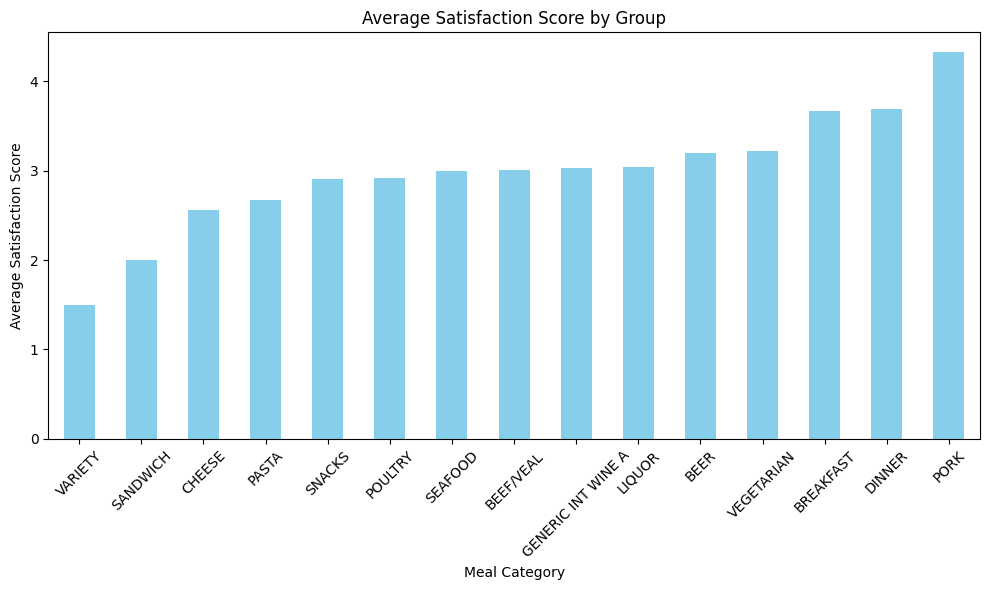

In [ ]:

print(merged_df)
# Group by 'driver_sub_group1' and calculate the mean satisfaction score
satisfaction_by_group = merged_df.groupby('meal_category')['score_y'].mean()

# Plot the average satisfaction scores for each group
plt.figure(figsize=(10, 6))
satisfaction_by_group.sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Meal Category')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

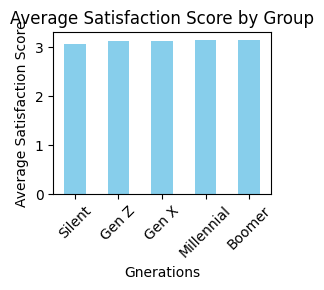

In [ ]:
# Group by 'driver_sub_group1' and calculate the mean satisfaction score
satisfaction_by_group = merged_df.groupby('generation')['score_y'].mean()

# Plot the average satisfaction scores for each group
plt.figure(figsize=(3, 3))
satisfaction_by_group.sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Gnerations')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

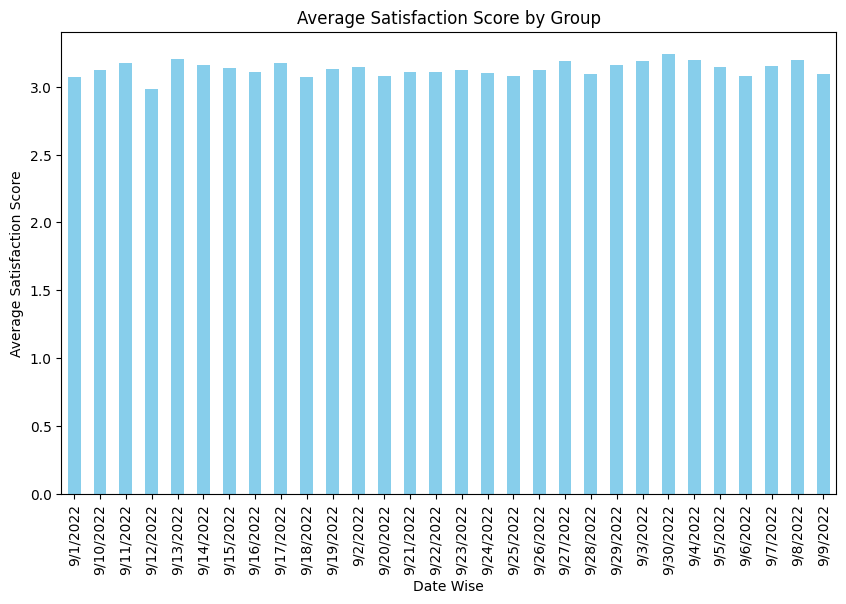

In [ ]:
# Group by 'driver_sub_group1' and calculate the mean satisfaction score
satisfaction_by_group = merged_df.groupby('scheduled_departure_dtl')['score_y'].mean()

# Plot the average satisfaction scores for each group
plt.figure(figsize=(10, 6))
satisfaction_by_group.plot(kind='bar', color='skyblue')
plt.xlabel('Date Wise')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Group')

plt.show()

This plot shows the trend of avg satisfaction score over the period of one moonth


In [ ]:

merged_df['scheduled_departure_dtl'] = pd.to_datetime(merged_df['scheduled_departure_dtl'])

# Calculate the mean satisfaction score for each date
mean_score_by_date = merged_df.groupby('scheduled_departure_dtl')['score_y'].mean()

# Identify dates where mean score is greater than 3.2 (good satisfaction)
good_satisfaction_dates = mean_score_by_date[mean_score_by_date > 3.2].index

# Filter the data for the identified good satisfaction dates
good_satisfaction_data = merged_df[merged_df['scheduled_departure_dtl'].isin(good_satisfaction_dates)]

print(good_satisfaction_data)

      flight_number departure_station_code arrival_station_code  \
2243           1938                    DFX                  ORX   
2244            296                    DEX                  GEX   
2245            296                    DEX                  GEX   
2246           2054                    IAX                  DEX   
2247           2054                    IAX                  DEX   
...             ...                    ...                  ...   
5593           1188                    BOX                  SFX   
5594            384                    HNX                  DEX   
5595            384                    HNX                  DEX   
5596            384                    HNX                  DEX   
5597            203                    ORX                  OGX   

     record_locator scheduled_departure_dtl  \
2243         B8XXGW              2022-09-13   
2244         IYXX44              2022-09-13   
2245         IYXX44              2022-09-13   
2246   

In [ ]:
all_meals_satisfaction = good_satisfaction_data[good_satisfaction_data['is_entree'] == 'Y'][['meal_short_description', 'score_y']]

print(all_meals_satisfaction)

                                 meal_short_description   score_y
2243  Za'atar chicken with spinach, roasted peppers,...  2.884615
2244  Za'atar chicken with spinach, roasted peppers,...  2.884615
2245  Za'atar chicken with spinach, roasted peppers,...  2.884615
2246                                     Scrambled eggs  3.789683
2247                           Gingerbread French Toast  3.630137
...                                                 ...       ...
5589                                       Thai chicken  3.200000
5590                               Brioche cheeseburger  2.990099
5591                               Brioche cheeseburger  2.990099
5592                                    Za’atar chicken  2.910913
5593                                    Za’atar chicken  2.910913

[270 rows x 2 columns]


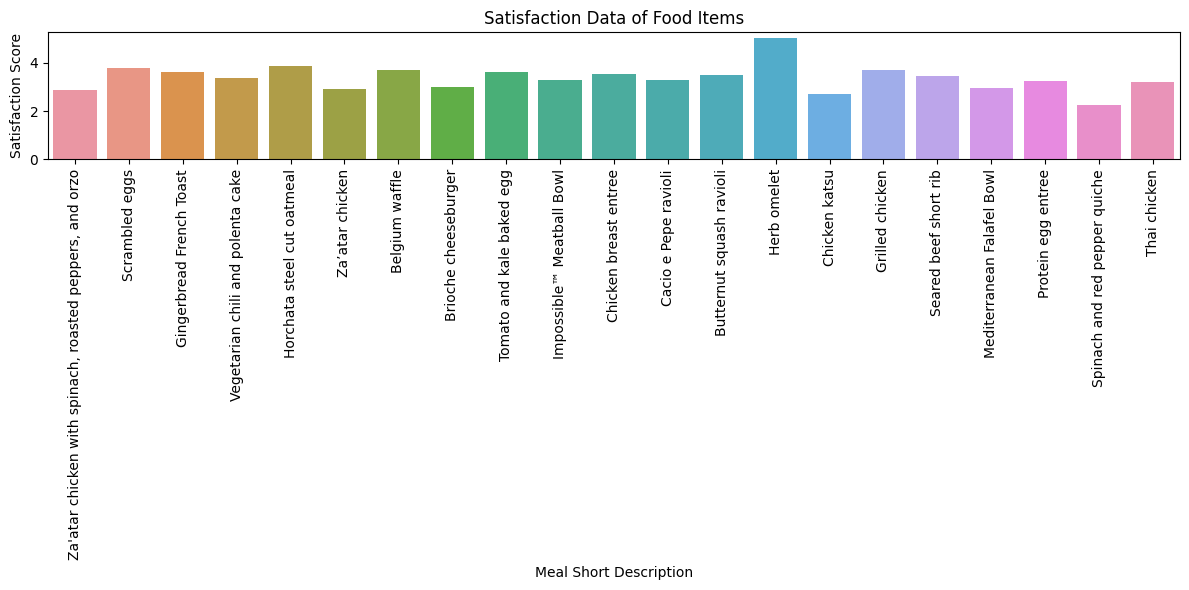

In [ ]:
plt.figure(figsize=(12, 6))
text = 'meal_short_description'
wrapped_lines = textwrap.wrap(text, width=20)
sns.barplot(data=all_meals_satisfaction, x='meal_short_description', y='score_y')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Meal Short Description')
plt.ylabel('Satisfaction Score')
plt.title('Satisfaction Data of Food Items')
plt.tight_layout()

plt.show()

Chicken dishes are performing at a constant pace and if there are further add ons to it are performing negatively. We can see spinach if added in any dishes or salad ordered by a customer is leading to a negatice feedback/ satisfaction .....this could be one of the major reasons for poor satisfaction


**Sentiment analysis**

In [ ]:

# Assuming you have obtained the 'customer_comments' DataFrame
# It should contain the 'verbatim_text' column

# Create a new column to store sentiment polarity
df3['sentiment_polarity'] = df3['verbatim_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

flight_sentiments = df3.groupby('flight_number')['sentiment_polarity'].mean()

# Classify sentiments
def classify_sentiment(polarity):
    if polarity > 0.15:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df3['sentiment'] = df3['sentiment_polarity'].apply(classify_sentiment)

flight_sentiments['overall_sentiment'] = flight_sentiments.apply(classify_sentiment)

df3.to_csv('sentiment_analysis_results.csv', index=False)


print(df3)

      flight_number departure_station_code destination_station_code  \
0               950                    LHX                      SFX   
1               950                    LHX                      SFX   
2              1876                    FLX                      EWX   
3              5469                    SFX                      SEX   
4               281                    DEX                      ANX   
...             ...                    ...                      ...   
9419           2175                    YYX                      ORX   
9420            680                    DEX                      GRX   
9421           1420                    CLX                      FLX   
9422           4746                    LAX                      EUX   
9423           3773                    IAX                      YOX   

     scheduled_departure_dtl arrival_delay_group departure_delay_group  \
0                 2022-09-01      Early & Ontime               Delayed   

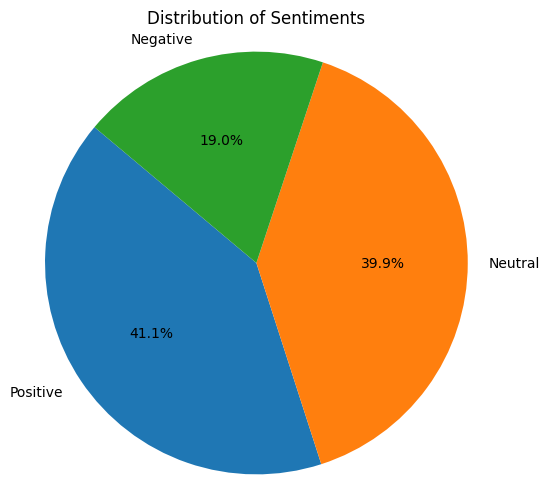

In [ ]:
values_to_remove = ["no.", "None.", "N/A.", "Na.", "Nothing.", "Nope.", "All good.", "Good.", "Thank You.", "No thank you.","Yes."]

# Remove rows where verbatim_text is in values_to_remove
filtered_comments = df3[~df3['verbatim_text'].isin(values_to_remove)]

# Save the filtered DataFrame to a new CSV file
filtered_comments.to_csv('filtered_comments.csv', index=False)
sentiment_counts = filtered_comments['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()
